# Regression Tree model on Car Data from CarDekho.com(India)

## First let's understand about Regression Tree Model

### Is Regression Tree Supervised / unsupervised Machine learning model?
Regression Tree Model is a supervised learning model where we predict a numerical value, with the help of a dataset. This model creates a tree which is used for regression to predict continous value outputs.

### What is the aim of this Machine learning model ie what you are intending to do using this model?
With the help of Regression Tree, I am intending to train a model with the help of a dataset with a data from a website(CarDekho.com) which sells used vehicles so that in future I can predict the value of dependent variable such as Price with the help of different independent variables such as fuel type, mileage, year of manufacture, accident claims etc. 

### Briefly discuss main concept behind this algorithm.
The main concept behind this algorithm is build a tree using a process done by system called binary recursive partitioning which is an iterative process that splits data into branches or partitions.


## Data description
- Car_Name - Model of the car
- Year - Manufacturing Year
- Selling_Price - Selling Price of the car
- Present_Price - Present Price of the car (Value in insurance)
- Kms_Driven - Mileage of the car
- Fuel_Type - CNG, Petrol, Deisel
- Seller_Type - Dealer or Individual sale
- Transmission - Transmission Automatic or Manual
- Owner - No of Owner

In [47]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns

from dmba import plotDecisionTree, classificationSummary, regressionSummary

from dmba.metric import AIC_score

In [48]:
# reading the data and adding it in the dataframe
data_df = pd.read_csv("/Users/mohitmehta/Desktop/BUSI_650_FinalAssignments/Datasets/CarDekhoData.csv")
data_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
# describing the datatypes of dataframe
data_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [50]:
# Car_Name variable is not required for the prediction so dropping this variable
data_df = data_df.drop(columns=['Car_Name'])

In [51]:
# crosstab command b/w Fuel_Type and Seller_Type
pd.crosstab(data_df.Fuel_Type,data_df.Seller_Type)

Seller_Type,Dealer,Individual
Fuel_Type,,
CNG,2,0
Diesel,59,1
Petrol,134,105


Here, we can see except the petrol car, all other types(CNG and Diesel) are being sold by dealer, this means Petrol cars are easier to sell individually.

In [52]:
# crosstab
pd.crosstab(data_df.Fuel_Type,data_df.Transmission)

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,2
Diesel,12,48
Petrol,28,211


Here, we can see two things:
1. Only Manual Cars which are in CNG is sold.
2. Manual Cars which is petrol are being sold more in the market

In [53]:
# crosstab command b/w Transmission and Seller_Type
pd.crosstab(data_df.Transmission,data_df.Seller_Type)

Seller_Type,Dealer,Individual
Transmission,,
Automatic,29,11
Manual,166,95


Here, we can see more number of manual cars are being sold in the market either individually or through seller.

In [54]:
# group by command for counting the number by grouping them
data_df.groupby('Fuel_Type')['Transmission'].value_counts()

Fuel_Type  Transmission
CNG        Manual            2
Diesel     Manual           48
           Automatic        12
Petrol     Manual          211
           Automatic        28
Name: Transmission, dtype: int64

If we see in Indian automobile market, petrol cars are being sold more whether it is automatic or manual because of the petrol cars registration is valid more than deisel cars.

<AxesSubplot:xlabel='Present_Price'>

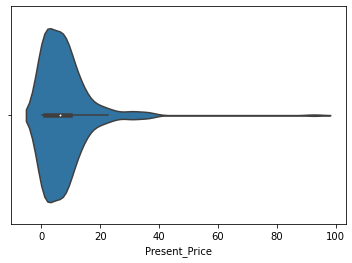

In [55]:
%matplotlib inline
sns.violinplot(x=data_df["Present_Price"],inner="box")

Most of the cars have present prices between 5 lacs and 16 lacs.

<AxesSubplot:xlabel='Selling_Price'>

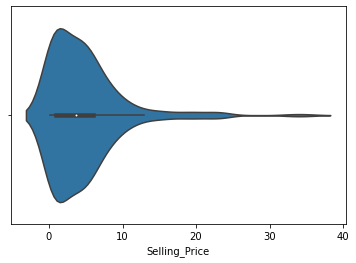

In [56]:
sns.violinplot(x=data_df["Selling_Price"],inner="box")

Most of the cars have selling prices between 3 lacs and 7 lacs.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

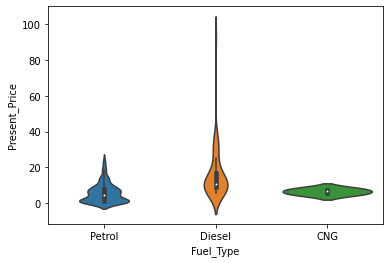

In [57]:
sns.violinplot(y='Present_Price',x='Fuel_Type',data=data_df,scale='area')

With this violinplot, it can be understood that diesel cars have more price whereas no of CNG cars are more in the database.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

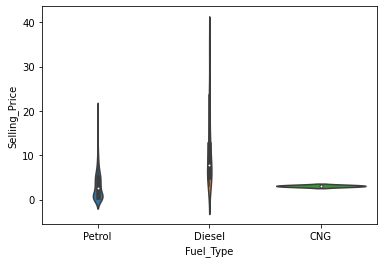

In [58]:
sns.violinplot(y='Selling_Price',x='Fuel_Type',data=data_df,scale='area')

With this violinplot, it can be understood that diesel cars have more selling price whereas no of CNG cars are more in the database.

<AxesSubplot:xlabel='Transmission', ylabel='Present_Price'>

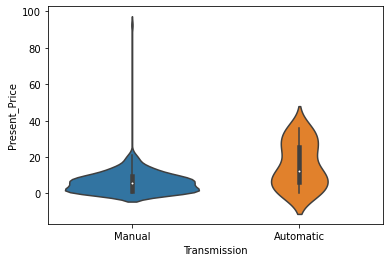

In [59]:
sns.violinplot(y='Present_Price',x='Transmission',data=data_df,scale='area')

From the above plot, it can be understood that present price of automatic cars lie between 10 and 30 lacs.

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

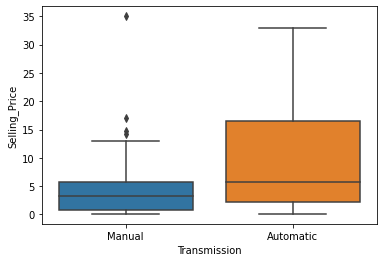

In [60]:
sns.boxplot(y='Selling_Price',x='Transmission',data=data_df)

From the above plot, it can be understood that selling price of automatic cars lie between 3 and 17 lacs.

In [61]:
# converting the categorical variables in the dataframe into binary or dummy variables
# use drop_first=True to drop the first dummy variable
data_df = pd.get_dummies(data_df, prefix_sep='_', drop_first=True)
data_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [62]:
data_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


<AxesSubplot:>

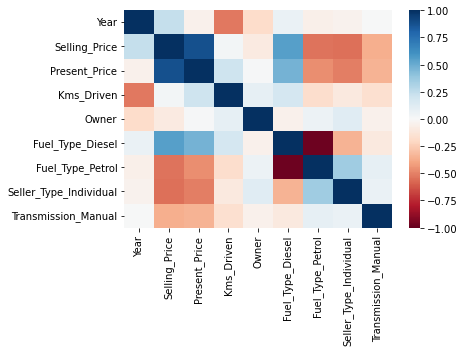

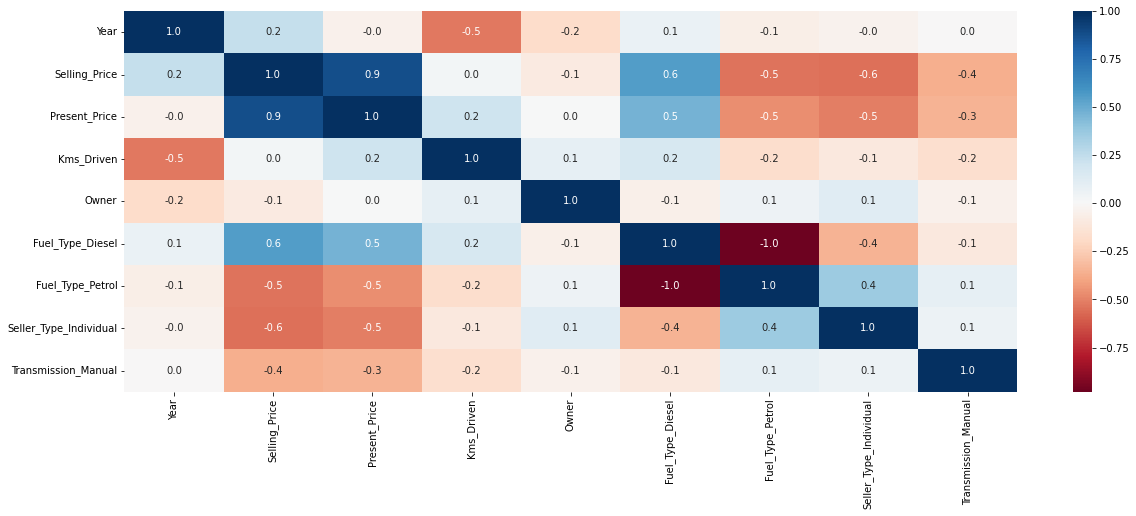

In [63]:
# drawing the correlation matrix to understand the correlation between the variables
corr = data_df.corr()
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

# Include information about values (example demonstrate how to control the size of
# the plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In the above correlation matrix, we can see Selling_Price and Present_Price are highly correlated and we are predicting the Price so dropping Selling_Price.

In [64]:
data_df.dtypes

Year                        int64
Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

In [65]:
predictors = ['Year', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']
outcome = 'Selling_Price'

In [66]:
X =  pd.get_dummies(data_df[predictors],drop_first = True)
Y= data_df[outcome]

In [67]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.6, random_state=1)

In [68]:
train_Y.head()

82     23.00
188     0.25
60      6.95
94      4.00
140     0.60
Name: Selling_Price, dtype: float64

In [69]:
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((120, 7), (181, 7), (120,), (181,))

In [70]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_Y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.5855718268750584
Initial parameters:  {'max_depth': 25, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [71]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_Y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.6026418973422943
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.008, 'min_samples_split': 15}


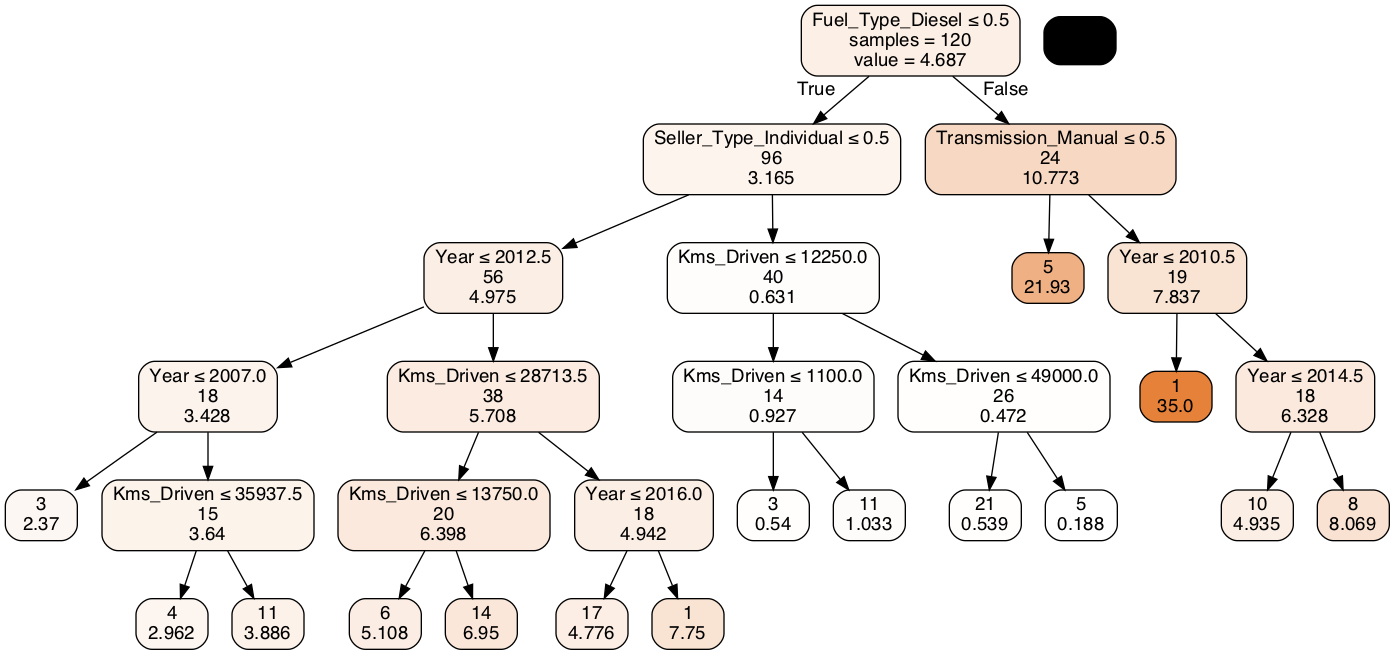

In [72]:
smallClassTree = DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.003,
                      min_samples_split=14)
smallClassTree.fit(train_X, train_Y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

Here is the regression tree for prediction of car Selling_Price which is affected by different predictors such as Kms_Driven, Year, Seller_Type.
Lets take an example of a decision node:
if fuel_type_diesel <=0 (means fuel_type_diesel is false) AND Seller_Type_Individual is false AND Year is less than or equal to 2012.5 AND Year is less than or equal to 2007 then there are 3 records with average price of 2.37 lac. 
With the help of this regression treee, we can predict the data using different decision nodes.

In [73]:
regTree = gridSearch.best_estimator_
print("Training Data")
regressionSummary(train_Y, regTree.predict(train_X))
print("\nValidation Data")
regressionSummary(valid_Y, regTree.predict(valid_X))

Training Data

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.7447
            Mean Absolute Error (MAE) : 0.9822
          Mean Percentage Error (MPE) : -18.4892
Mean Absolute Percentage Error (MAPE) : 36.5927

Validation Data

Regression statistics

                      Mean Error (ME) : -0.3437
       Root Mean Squared Error (RMSE) : 4.9732
            Mean Absolute Error (MAE) : 2.0876
          Mean Percentage Error (MPE) : -30.0431
Mean Absolute Percentage Error (MAPE) : 57.5385


# Decision Tree

In [74]:
# reading the data and adding it in the dataframe
data_df = pd.read_csv("/Users/mohitmehta/Desktop/BUSI_650_FinalAssignments/Datasets/heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


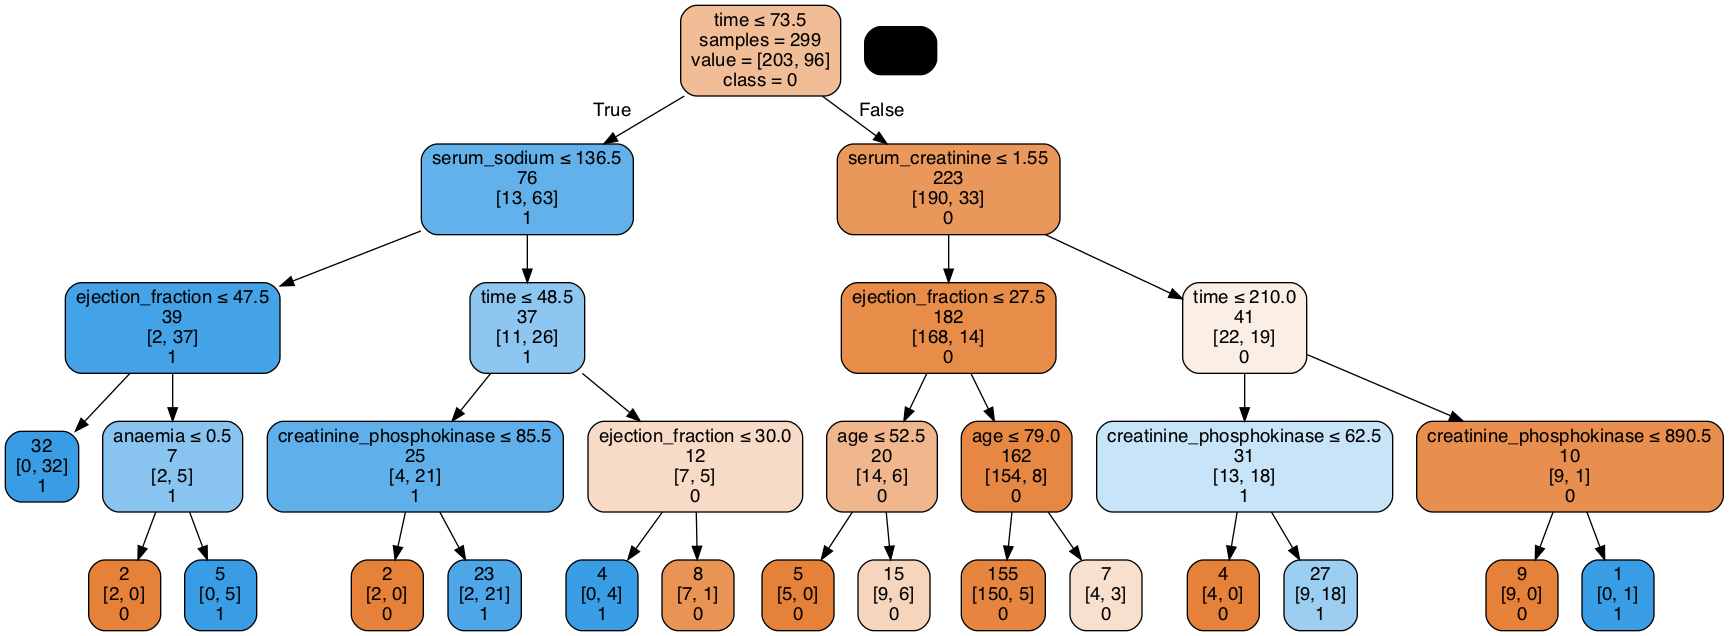

In [75]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=4)
classTree.fit(data_df.drop(columns=['DEATH_EVENT']), data_df['DEATH_EVENT'])
plotDecisionTree(classTree, feature_names=data_df.columns[:12], 
                 class_names=classTree.classes_)

Here is the decision tree for "DEATH_EVENT" which is affected by different predictors.
Lets take an example of a decision node:
if follow-up time is less than or equal to 73.5 days AND serium_sodium is less than or equal to 136.5 AND ejection_fraction is less than or equal to 47.5 then there are 32 records which have "DEATH_EVENT" 1 which means with these conditions 32 people died.